In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from statistics import multimode

In [2]:
def knn(x, X, Y, k=5):
    dists = np.sqrt(((x - X)**2).sum(axis=1))
    idx = np.argsort(dists)[:k]
    y_hat = multimode(Y[idx])[0]
    return y_hat

In [3]:
X, Y = load_iris(return_X_y=True)
X = X[:, :2]  # to simplify viz

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

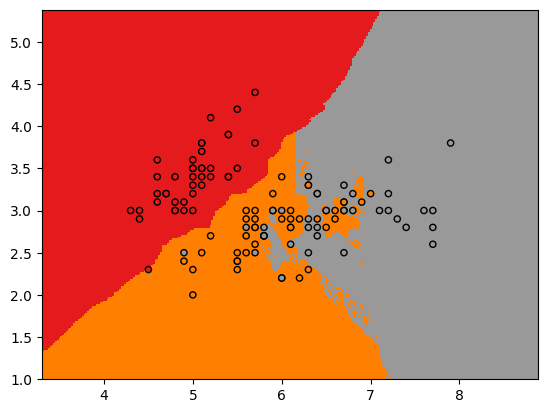

In [5]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

Z = np.array([knn(np.array([xxi, yyi]), X_train, Y_train, k=5) for xxi, yyi in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap="Set1")

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolor='k', s=20, cmap="Set1")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()